In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics

df= pd.read_csv('Lifetime.csv', encoding ="latin1")
df.head()

,ï»¿month_yr,CustomerID,Gender,Age,Income (â¬000),Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,CLV
0,0,12346,F,55,50,0.00,0.00,0.00,0.00,0.00,7183.60,0.00,0.00,0.00,0.00,0.00,0.00,24506.25
1,1,12747,M,23,49,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,4196.01
2,2,12748,F,44,48,1100.37,898.24,1658.25,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,1639.72,2292.84,32619.36
3,3,12749,M,23,30,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,8950.20
4,4,12820,M,20,40,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,942.34


In [2]:
df.dtypes

ï»¿month_yr          int64
CustomerID           int64
Gender              object
Age                  int64
Income (â¬000)      int64
Apr-20             float64
May-20             float64
Jun-20             float64
Jul-20             float64
Aug-20             float64
Sep-20             float64
Oct-20             float64
Nov-20             float64
Dec-20             float64
Jan-21             float64
Feb-21             float64
Mar-21             float64
CLV                float64
dtype: object

# Q1 - Remove any null values

In [3]:
#columns that have null values
df.isnull().sum()

ï»¿month_yr        0
CustomerID         0
Gender             1
Age                0
Income (â¬000)    0
Apr-20             0
May-20             0
Jun-20             0
Jul-20             0
Aug-20             0
Sep-20             0
Oct-20             0
Nov-20             0
Dec-20             0
Jan-21             0
Feb-21             0
Mar-21             0
CLV                0
dtype: int64

In [4]:
df1 = df.fillna(0)
df1.head()

,ï»¿month_yr,CustomerID,Gender,Age,Income (â¬000),Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,CLV
0,0,12346,F,55,50,0.00,0.00,0.00,0.00,0.00,7183.60,0.00,0.00,0.00,0.00,0.00,0.00,24506.25
1,1,12747,M,23,49,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,4196.01
2,2,12748,F,44,48,1100.37,898.24,1658.25,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,1639.72,2292.84,32619.36
3,3,12749,M,23,30,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,8950.20
4,4,12820,M,20,40,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,942.34


# Q2 - We need to know which months show a strong correlation to the target variable Customer Lifetime Value (CLV). 

In [5]:
cleaned_data = df.drop("CustomerID", axis=1)
cleaned_data.head(2)

,ï»¿month_yr,Gender,Age,Income (â¬000),Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,CLV
0,0,F,55,50,0.0,0.0,0.00,0.0,0.0,7183.60,0.0,0.0,0.00,0.00,0.00,0.00,24506.25
1,1,M,23,49,0.0,301.7,706.27,438.5,0.0,303.04,0.0,376.3,310.78,771.31,312.73,675.38,4196.01


In [6]:
cleaned_data.corr()['CLV'].nlargest(5,)

CLV       1.000000
Oct-20    0.760181
Dec-20    0.726635
Nov-20    0.712674
Age       0.687254
Name: CLV, dtype: float64

# Q3 - Plot a correlation graph (heatmap or scatterplot).

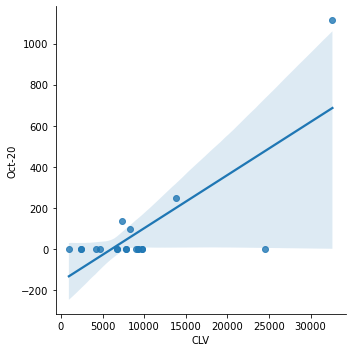

In [7]:
#Oct-20    0.760181
sn.lmplot(x="CLV", y="Oct-20", data=cleaned_data);

# Q4 - Build a model that can predict the Customer Lifetime Value (CLV) for new customers. 

In [8]:
predictors = cleaned_data.drop("CLV", "month_yr" axis=1)
targets = cleaned_data.CLV
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.2)
print( "Predictor - Training: ", pred_train.shape, "Predictor - testing: ", pred_test.shape)

SyntaxError: invalid syntax (Temp/ipykernel_9756/1726182565.py, line 1)

In [ ]:
#Build model on training data
model = LinearRegression()
model.fit(pred_train, tar_train)
print("Coefficients: \n", model.coef_)
print("Intercept: ", model.intercept_)


#test on testing data
predictions = model.predict(pred_test)
predictions

sklearn.metrics.r2_score(tar_test, predictions)
#output shows the accuracy of the predicting CLV model is ?%.